<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/4_Feed_Forward_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
# make_blob is used to generate non linear separable data


In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
  
  # Forward Pass
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  # Gradient Computation

  # weights for mean square error
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  
  # bias for mean square error
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  

  # weights for cross-entropy loss
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1-y_pred) * x
    else :
      raise ValueError("Y should be 0 or 1")


  # bias for cross-entropy loss
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred
    elif y == 1:
      return -1 * (1-y_pred)
    else :
      raise ValueError("Y should be 0 or 1")

  


  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn = "mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y) 

      m = X.shape[1]       
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y_pred, Y)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      if loss_fn == "mse" :
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce" :
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

#Generate Data

In [0]:
data, labels = make_blobs(n_samples=1000,n_features=2, centers=4,random_state=0)
print(data.shape,"\n", labels.shape)

#centres = 4 : 0,1,2,3 it tells us how many clusters we want

(1000, 2) 
 (1000,)


In [0]:
#x1
print(data[:,0])

[-2.50804312  0.4666179  -2.94062621 -2.89994656  2.34438803  0.87305123
  0.84032038  1.66287852  0.85810603 -0.72183574 -2.91242876  2.5539578
 -1.80372701 -1.29336908  1.12247848 -2.89206689 -2.42327374 -1.21013777
  0.4334086   2.6112302  -0.63762777 -0.38915158  2.42281242  0.61032732
  0.05105181 -2.24684455  2.03184442  1.50095789  1.85237068 -2.00715305
  2.72583797  1.13277662 -1.45654088 -0.560136    0.14227819  3.13950603
 -1.7379808   2.102906   -0.1223585  -0.84944184  1.3151742  -0.17119857
  0.60708824 -1.566172   -1.97218448  0.62283833  1.25671178 -0.92913737
 -1.47173266  0.06750683  3.28013809  2.12860164  0.84256852 -1.31193842
 -1.51946311  1.37724174 -0.65392827 -0.18108518 -1.6051273  -0.39772509
 -0.18433654  1.52256473 -1.70036791 -2.15246105 -0.09355151  0.7185082
  2.29540695 -1.13781004 -1.78024958 -1.30854331 -1.14302364 -1.02090982
 -0.43027817  0.13370355  0.78561658 -1.03301531  0.81860306 -0.26461958
 -2.73063921  2.99618514 -0.00924066 -1.57671974  1.5

In [0]:
#x2
print(data[:,1])

[ 7.86408052e+00  3.86571303e+00  8.56480636e+00  1.85014025e+00
  1.31053448e+00  4.71438583e+00  5.44067869e+00 -2.14847939e+00
  3.62360912e+00  4.69106780e+00  7.70889068e+00  1.94563582e+00
  4.04178757e+00  7.91458174e+00  2.14098304e+00  4.86498090e+00
  9.55150252e-01  7.25654188e+00  4.71983737e+00  1.79013755e+00
  4.09104705e+00  7.02583344e+00  1.08797522e+00 -3.12879334e-01
  1.27454018e+00  2.02430786e+00  1.97685839e+00  4.27026002e-01
  7.87780881e-01  3.85398981e+00  1.90157962e-01  4.53596836e+00
  9.40983125e+00  3.42595017e+00  6.19411141e+00  5.64031528e+00
  7.55616335e+00  3.22385582e+00  3.06432303e+00  2.96970265e+00
  6.32483089e+00  3.86596728e+00  4.06440815e+00  1.96894945e+00
  6.71583178e+00  2.68731314e+00  3.31066372e+00  8.14272480e+00
  3.21685972e+00  3.87946971e+00  9.62519766e-01  5.38340592e+00
  5.38153113e+00  3.01510149e+00  6.51828523e+00  2.19550945e+00
  4.76656958e+00  3.99149508e+00  8.38111734e+00  6.99633583e+00
  1.29916272e+00  1.98841

In [0]:
#Y
print(labels)

[3 0 3 2 1 0 0 1 0 0 3 1 2 3 1 2 2 3 0 1 0 3 1 1 1 2 1 1 1 2 1 0 3 2 3 0 3
 0 2 2 0 0 0 2 3 0 0 3 2 0 1 0 0 2 3 1 0 0 3 3 1 1 2 2 2 3 0 2 3 3 3 3 3 2
 0 3 0 3 2 1 0 0 0 2 1 0 0 0 2 2 3 2 2 3 3 3 2 2 0 0 1 2 0 1 0 2 0 3 2 1 0
 0 2 3 2 2 0 2 1 1 1 3 2 2 0 1 0 3 2 1 1 0 2 0 0 0 2 0 1 3 1 3 1 0 3 3 1 0
 3 3 1 0 0 0 2 0 0 0 1 2 3 1 0 0 0 0 3 3 0 1 2 1 1 1 2 1 2 1 1 0 2 0 2 0 0
 2 1 2 1 3 2 0 1 1 2 3 2 3 2 2 2 0 3 3 1 1 2 0 3 0 3 2 0 3 2 0 0 1 1 3 0 0
 0 3 0 0 0 2 3 3 0 2 0 0 2 1 2 1 1 2 0 2 1 1 3 3 3 3 3 3 0 2 3 2 2 1 2 0 3
 0 1 3 0 1 3 2 0 2 3 1 1 0 1 2 3 3 2 3 2 0 1 3 2 0 2 2 2 0 2 3 1 2 0 3 3 1
 3 1 0 3 1 3 3 2 2 3 0 0 1 0 0 0 3 1 2 0 2 1 0 3 0 3 1 2 2 0 3 1 3 1 3 1 3
 2 2 3 1 0 1 0 2 0 3 0 1 1 1 1 1 1 2 1 2 1 0 3 1 3 3 0 0 0 0 3 3 2 3 3 3 0
 3 1 2 3 2 1 2 0 3 3 3 0 2 1 1 1 3 3 2 3 1 3 1 3 2 3 3 1 1 0 3 2 3 2 2 1 0
 0 0 3 2 0 2 2 2 0 0 3 1 3 0 2 2 2 3 0 3 3 0 0 2 1 2 3 3 0 2 0 1 3 1 3 3 2
 2 0 1 0 0 0 2 3 0 2 3 1 2 1 3 1 0 1 0 3 3 1 2 3 3 1 0 2 0 0 0 0 0 1 2 0 2
 0 1 0 3 2 2 3 3 3 3 1 2 

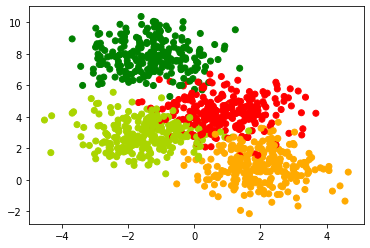

In [0]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap=my_cmap)
plt.show()
# 3d plot

In [0]:
labels_orig = labels
labels = np.mod(labels_orig,2)

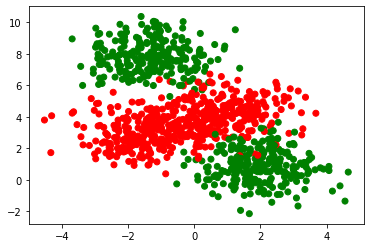

In [0]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap=my_cmap)
plt.show()
# 3d plot

In [0]:
#The above graph clearly shows that it is not linearly separable

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data,labels,stratify=labels,random_state =0)
print("Train data : \n", X_train.shape, Y_train.shape)
print("\nStratify ensures that distribution of red and green class is same in train and test data. ")

Train data : 
 (750, 2) (750,)

Stratify ensures that distribution of red and green class is same in train and test data. 


In [0]:
print("Validation data : \n", X_val.shape, Y_val.shape)

Validation data : 
 (250, 2) (250,)


In [0]:
sn = SigmoidNeuron()

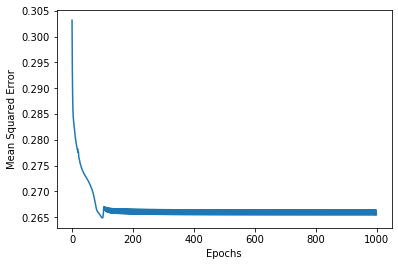

In [0]:
sn.fit(X_train,Y_train,epochs=1000,learning_rate=1,display_loss=True)

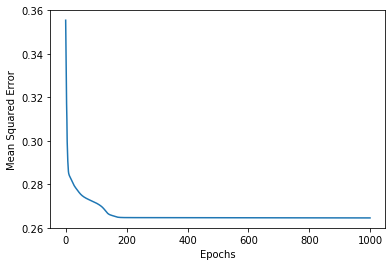

In [0]:
sn.fit(X_train,Y_train,epochs=1000,learning_rate=0.5,display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()


In [0]:
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

In [0]:
print(round(accuracy_score(Y_pred_binarised_train,Y_train),2))

0.73


In [0]:
print(round(accuracy_score(Y_pred_binarised_val,Y_val),2))

0.72


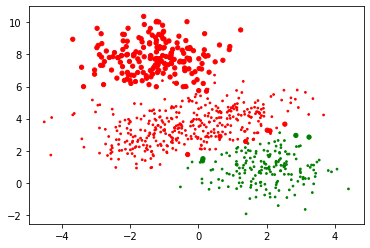

In [0]:
plt.scatter(X_train[:,0],X_train[:,1], c=Y_pred_binarised_train , cmap=my_cmap, s= 15*(np.abs(Y_pred_binarised_train - Y_train)+.2))
plt.show()
#size is either 3 or 18
# 4 d plot
# size is correct predictions

#First Feed Forward Network

In [0]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

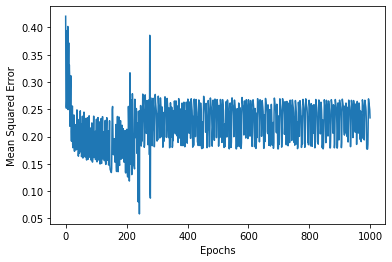

0.73
0.72


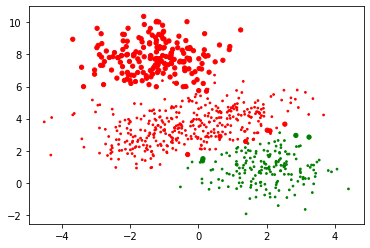

In [0]:
ffn = FirstFFNetwork()
ffn.fit(X_train,Y_train,epochs=1000,learning_rate=0.1,display_loss=True)
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
print(round(accuracy_score(Y_pred_binarised_train,Y_train),2))
print(round(accuracy_score(Y_pred_binarised_val,Y_val),2))
plt.scatter(X_train[:,0],X_train[:,1], c=Y_pred_binarised_train , cmap=my_cmap, s= 15*(np.abs(Y_pred_binarised_train - Y_train)+.2))
plt.show()
#size is either 3 or 18
# 4 d plot
# size 3 is correct predictions

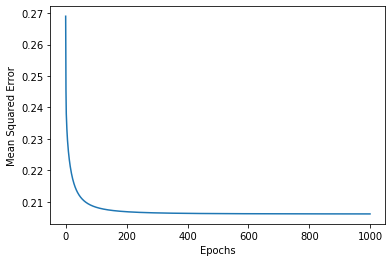

0.67
0.66


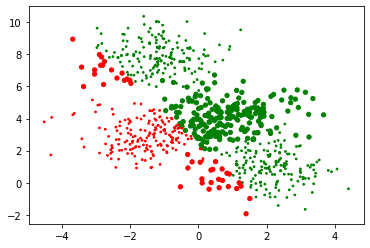

In [0]:
ffn = FirstFFNetwork()
ffn.fit(X_train,Y_train,epochs=1000,learning_rate=0.01,display_loss=True)
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
print(round(accuracy_score(Y_pred_binarised_train,Y_train),2))
print(round(accuracy_score(Y_pred_binarised_val,Y_val),2))
plt.scatter(X_train[:,0],X_train[:,1], c=Y_pred_binarised_train , cmap=my_cmap, s= 15*(np.abs(Y_pred_binarised_train - Y_train)+.2))
plt.show()
#size is either 3 or 18
# 4 d plot
# size 3 is correct predictions

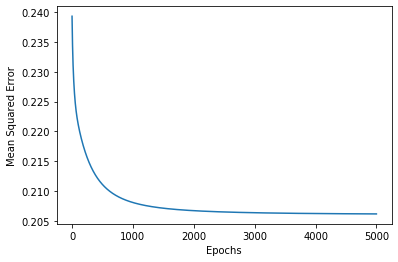

0.67
0.66


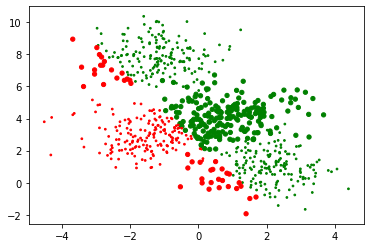

In [0]:
ffn = FirstFFNetwork()
ffn.fit(X_train,Y_train,epochs=5000,learning_rate=0.001,display_loss=True)
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
print(round(accuracy_score(Y_pred_binarised_train,Y_train),2))
print(round(accuracy_score(Y_pred_binarised_val,Y_val),2))
plt.scatter(X_train[:,0],X_train[:,1], c=Y_pred_binarised_train , cmap=my_cmap, s= 15*(np.abs(Y_pred_binarised_train - Y_train)+.2))
plt.show()
#size is either 3 or 18
# 4 d plot
# size 3 is correct predictions

#  Our feed forward network performed better than our sigmoid neuron because the FFN has more capacity to learn than the sigmoid neuron, thanks to increase in number of the learnable parameters



#Feed Forward Network - Generic Class

In [0]:
class FFSNNetwork:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

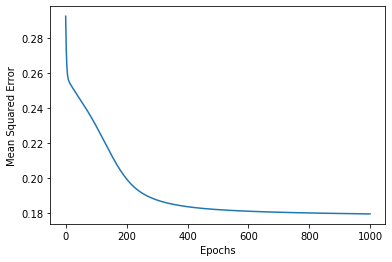

In [0]:
ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs=1000, learning_rate=.001, display_loss=True)


In [0]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.72


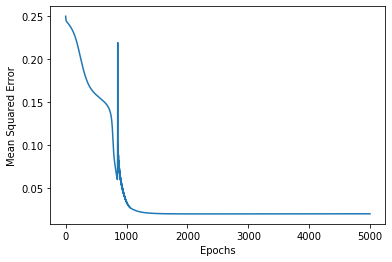

Training accuracy 0.97
Validation accuracy 0.94


In [0]:
ffsnn.fit(X_train, Y_train, epochs=5000, learning_rate=.001, display_loss=True)
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

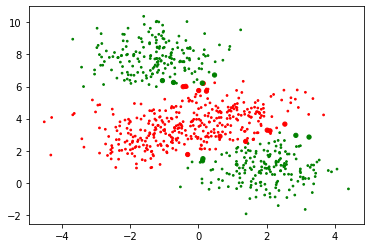

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In [0]:
class FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [0]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

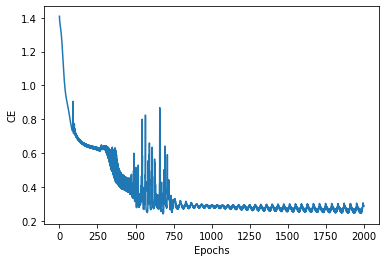

In [47]:
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train,y_OH_train,epochs=2000,learning_rate=.005,display_loss=True)

In [45]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.87
Validation accuracy 0.87


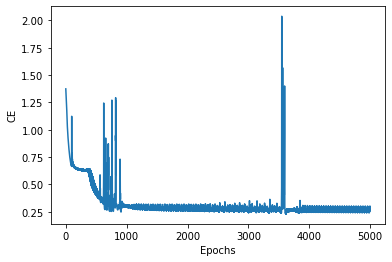

Training accuracy 0.9
Validation accuracy 0.92


In [51]:
ffsn_multi.fit(X_train,y_OH_train,epochs=5000,learning_rate=.005,display_loss=True)

Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

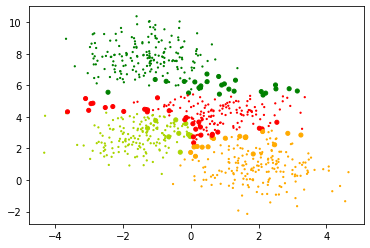

In [50]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()